In [2]:
import setup

setup.main()
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import os

import matplotlib.pyplot as plt
import numpy as np

os.environ["GEOMSTATS_BACKEND"] = "pytorch"

Working directory:  /home/facosta/neurometry/neurometry
Directory added to path:  /home/facosta/neurometry
Directory added to path:  /home/facosta/neurometry/neurometry
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [3]:
def relu(x):
    return np.maximum(x, 0)

In [51]:
x = np.arange(0, 14, 0.1)

period_1 = 1

period_2 = 1.4

period_3 = 2

phases_1 = (2 * np.pi * x / period_1) % (2 * np.pi)

phases_2 = (2 * np.pi * x / period_2) % (2 * np.pi)

phases_3 = (2 * np.pi * x / period_3) % (2 * np.pi)

In [52]:
def grid_cell(period, phase):
    def rate(x):
        return relu(np.cos(2 * np.pi * x / period - phase))

    return rate


module_1 = [rate(x) for rate in [grid_cell(period_1, phase) for phase in phases_1]]

module_2 = [rate(x) for rate in [grid_cell(period_2, phase) for phase in phases_2]]

module_3 = [rate(x) for rate in [grid_cell(period_3, phase) for phase in phases_3]]

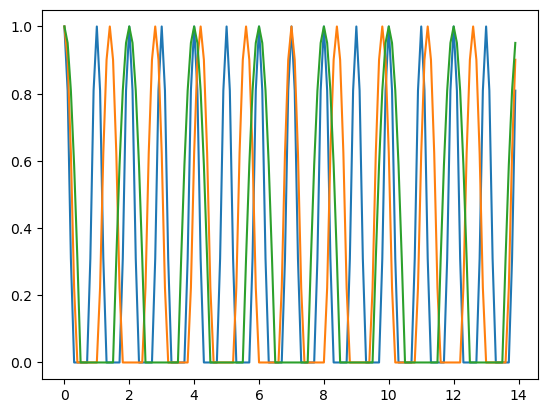

In [53]:
plt.plot(x, module_1[0], label="module 1")
plt.plot(x, module_2[0], label="module 2")
plt.plot(x, module_3[0], label="module 3");

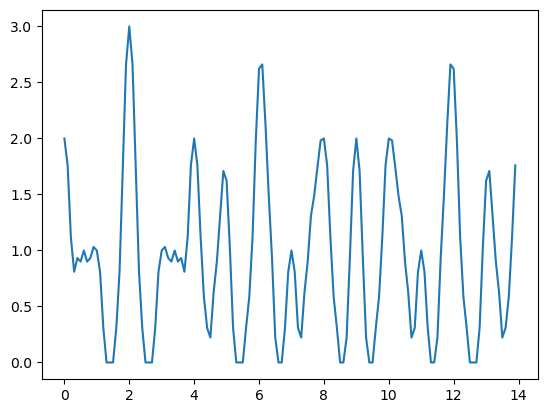

In [54]:
pos = 2

idx = round(pos / max(x) * len(x))

plt.plot(x, module_1[idx] + module_2[idx] + module_3[idx], label="sum");

In [55]:
def place_cell(loc, width):
    def rate(x):
        return np.exp(-((x - loc) ** 2) / (2 * width**2))

    return rate

In [56]:
width = 1

place_cells = [rate(x) for rate in [place_cell(loc, width) for loc in x]]

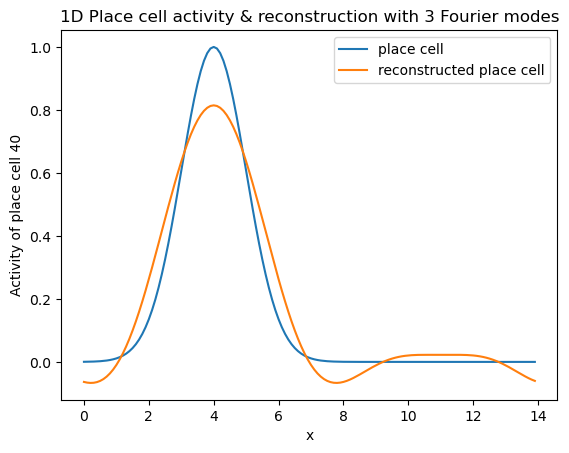

In [90]:
pos = 4

idx = round(pos / max(x) * len(x))

# compute fourier transform of the place cell

fourier_coefficients = np.fft.fft(place_cells[idx])

num_modules = 3

modified_coefficients = np.zeros_like(fourier_coefficients)
modified_coefficients[: num_modules + 1] = fourier_coefficients[: num_modules + 1]


if num_modules > 1:  # Preserve symmetry for real signals
    modified_coefficients[-(num_modules - 1) :] = fourier_coefficients[
        -(num_modules - 1) :
    ]

# Inverse Fourier transform to reconstruct the signal
reconstructed_signal = np.fft.ifft(modified_coefficients)

plt.plot(x, place_cells[idx], label="place cell")

plt.plot(x, reconstructed_signal, label="reconstructed place cell")

plt.xlabel("x")

plt.ylabel(f"Activity of place cell {idx}")

plt.title(f"1D Place cell activity & reconstruction with {num_modules} Fourier modes")

plt.legend();